# Trabajo de investigación nro 3
1. Jean Pierre Tinco Bellido.
   
### 1. Desarrollo de modelos
Habilidades a desarrollar:
* Modelo supervisado (8 ptos)
Dataset 1: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database (500 vs 260)
  1. Undersampling y oversampling. Tomek Links, Scut, Smote.
  2. Clasificadores de Bayes
  3. Comparación de modelos de clasificación.
  4. Árboles de decisión 
     1. Iterative Dichotomizer 3
* Modelo no supervisado (5 ptos) https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data
  1. Clusterización a través de KMeans. Desarrollar el procedimiento para elegir un K.
  
### 2. Lectura (congreso)
Elegir el 1 o el 2
1. Congreso (hasta 4ptos) [opcional]
2. The Digitalist Papers. Un conjunto de 12 ensayos que presentan los posibles futuros que la revolución de la IA puede producir. (4 puntos)
   1. [Informational GPS](https://www.digitalistpapers.com/essays/informational-gps) [2pts]
      1. Según el ensayo ¿Qué relación existe entre la tecnología Global Positioning System (GPS) y los Large Language Models (LLMs)? Menciona las similitudes y diferencias en una tabla comparativa.
   2. Según en ensayo [The Potential for AI to Restore Local Community Connectedness, The Bedrock of a Healthy Democracy](https://www.digitalistpapers.com/essays/the-potential-for-ai-to-restore-local-community-connectedness-the-bedrock-of-a-healthy-democracy) responder las siguientes preguntas [2pts]
      1. ¿Cómo la IA puede ayudar a generar mejores conexiones con nuestra sociedad? 
      2. ¿Cómo las plataformas pueden ser la base de mejores redes de soporte en la comunidad?
      3. ¿Es posible utilizar IA para evitar posibles comentarios ofensivos? En caso sea así ¿Para qué se utilizaría?

### 3. Multimedia
Las siguientes entrevistas son realizadas a personas dirigiendo las compañías que están liderando el desarrollo de IA en el mundo. 
   1. [The Future Mark Zuckerberg Is Trying To Build](https://www.youtube.com/watch?v=oX7OduG1YmI)
   2. [Google CEO Sundar Pichai and the Future of AI](https://www.youtube.com/watch?v=5puu3kN9l7c)
   3. [Inside OpenAI, the Architect of ChatGPT, featuring Mira Murati](https://www.youtube.com/watch?v=p9Q5a1Vn-Hk)   

---

## Parte 1: Desarrollo de modelos

### Modelo Supervisado

#### a) Luego de una lectura del dataset ¿Existe un desbalance en el dataset? En caso sea así ¿Cuál es la proporción de desbalance? [0.5 pts]

##### Lectura del dataset

In [1]:
import pandas as pd


dataset=pd.read_csv('diabetes.csv')

dataset.info()

dataset.isnull().sum()
dataset.isna().sum()


print("Cantidad en cada clase:",dataset['Outcome'].value_counts())


# La proporcion del desbalance es 500 en clase 0 y 268 en clase 1 lo que da un desbalance de 232


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Cantidad en cada clase: Outcome
0    500
1    268
Name: count, dtype: int64


##### Distribucion de los datos

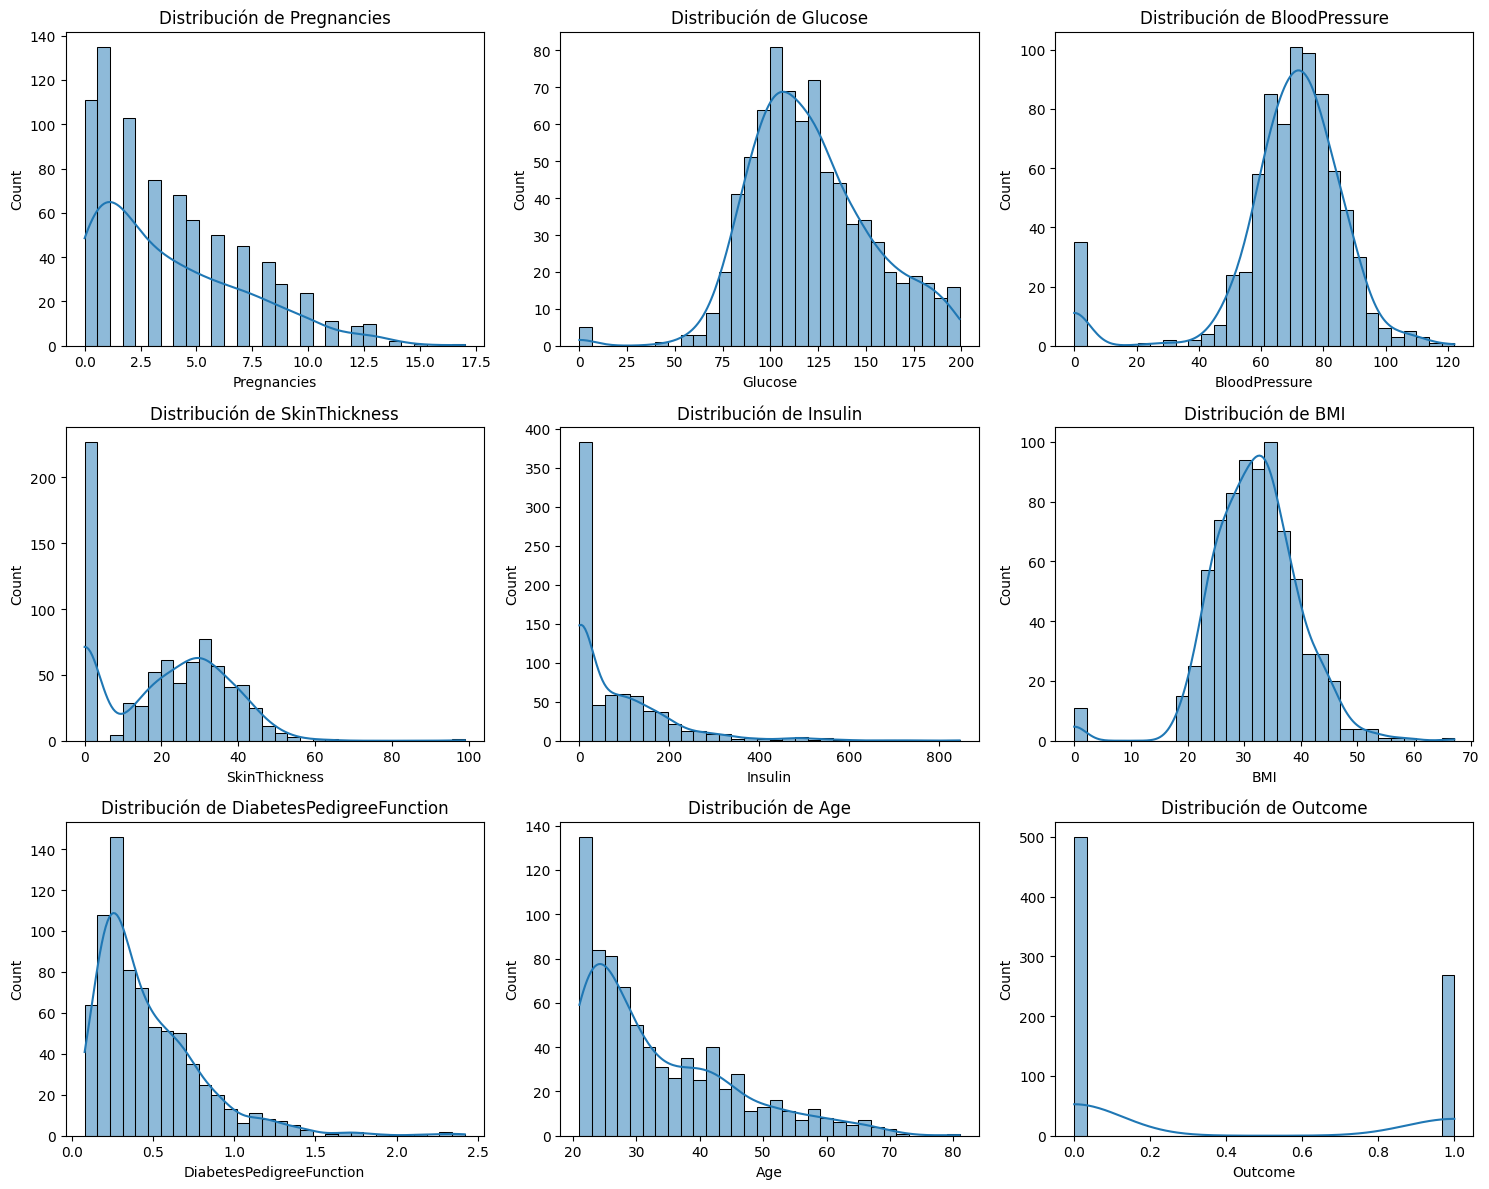

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 12))

for i, column in enumerate(dataset.columns, 1):
    plt.subplot(3, 3, i) 
    sns.histplot(dataset[column], kde=True, bins=30)
    plt.title(f'Distribución de {column}')

plt.tight_layout()
plt.show()

# Como podemos ver hay valores 0 que estan afectando la correcta distribucion de los datos en las columnas Glucose,BoodPressure
# SkinThickness,Insulin y BMI

##### Eliminado valores que tienen 0

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    float64
 2   BloodPressure             392 non-null    float64
 3   SkinThickness             392 non-null    float64
 4   Insulin                   392 non-null    float64
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 30.6 KB


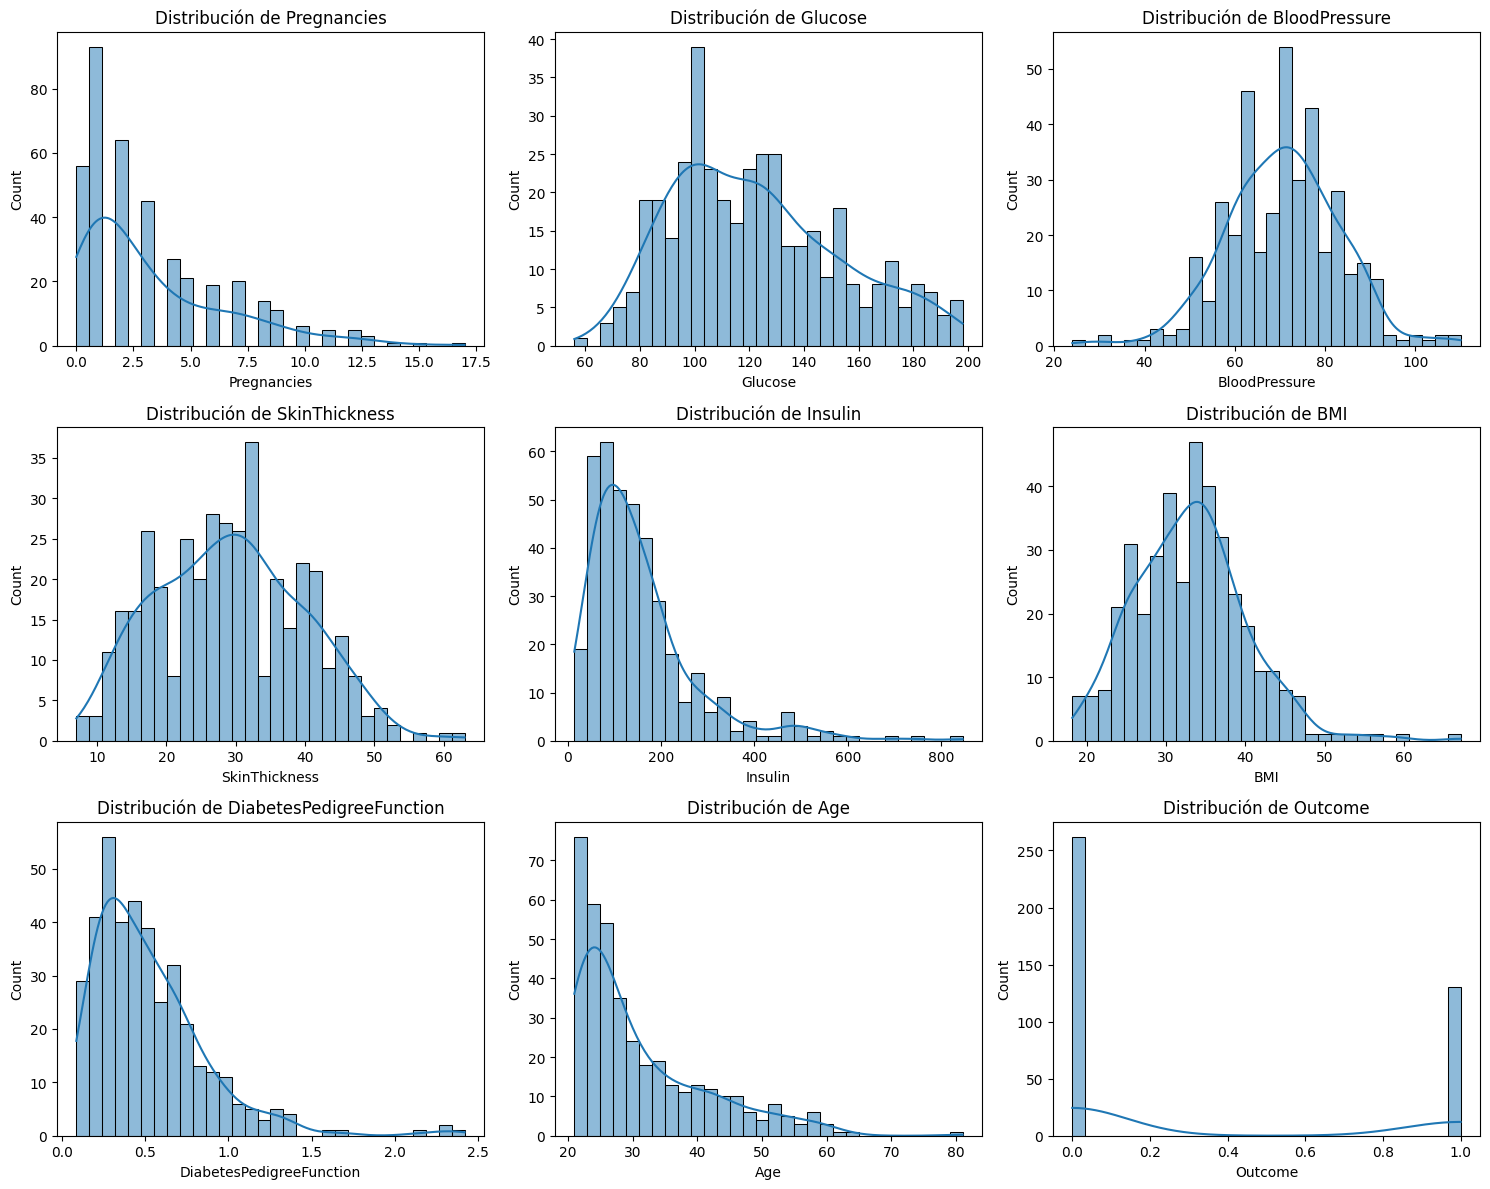

In [3]:
import numpy as np
columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

dataset[columns_to_clean] = dataset[columns_to_clean].replace(0, np.nan)

dataset=dataset.dropna(subset=columns_to_clean)

dataset.info()
plt.figure(figsize=(15, 12))


for i, column in enumerate(dataset.columns, 1):
    plt.subplot(3, 3, i)  
    sns.histplot(dataset[column], kde=True, bins=30)  
    plt.title(f'Distribución de {column}')

plt.tight_layout()
plt.show()

#### b) Identifique outliers en el dataset. En caso existan, elimínelos [0.5 pts]


##### Visualizacion de valores atipicos

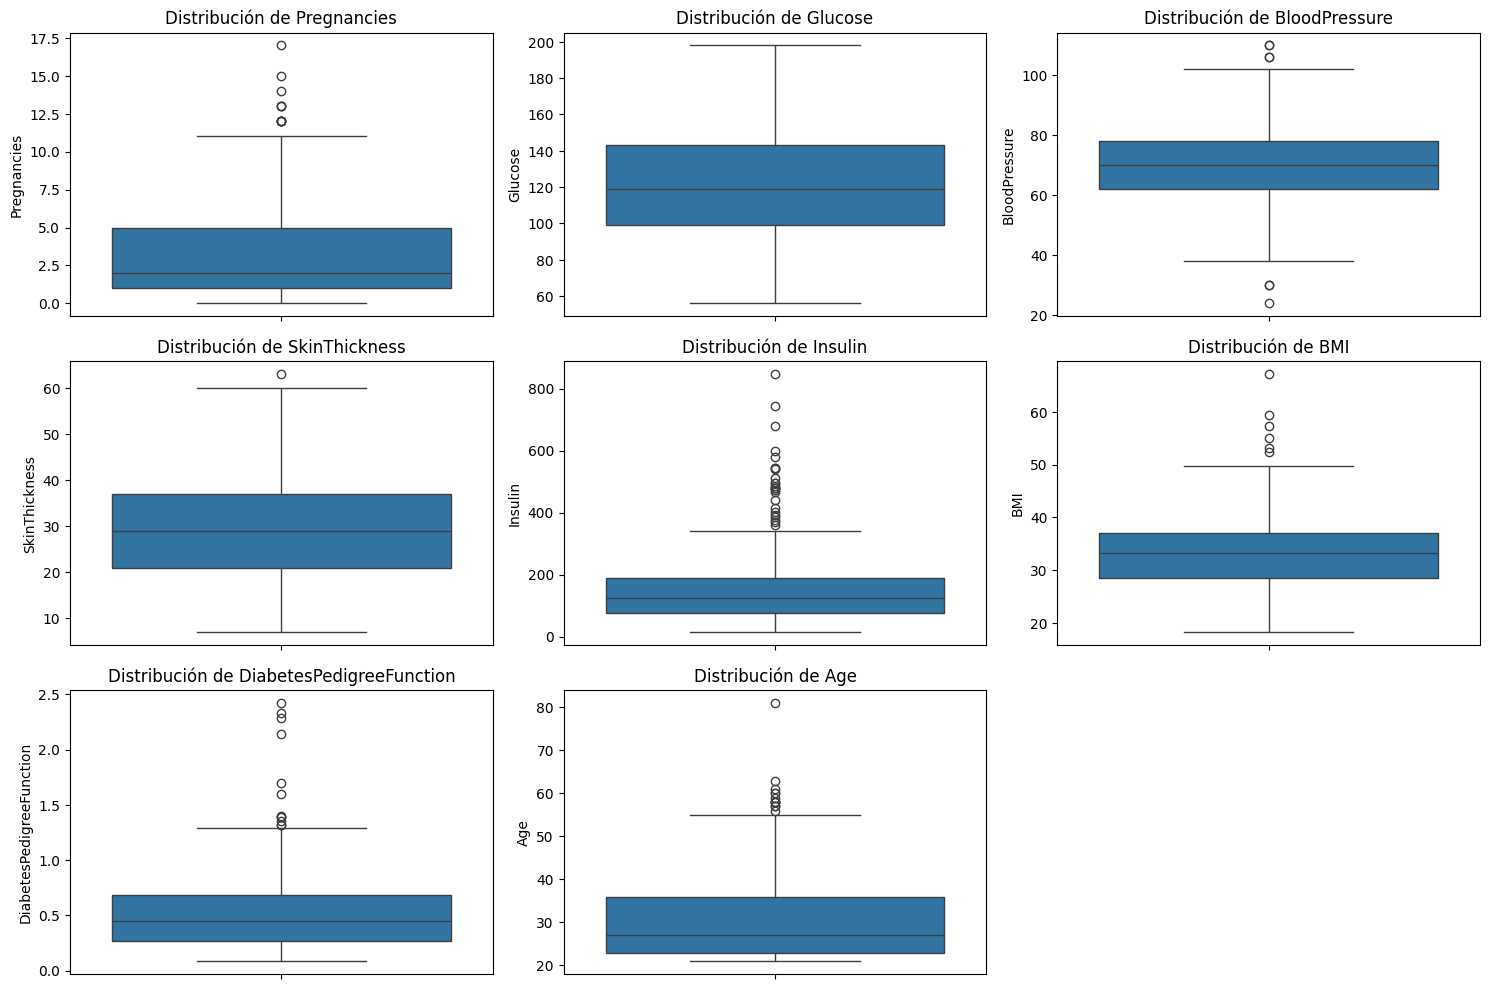

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15,10))

for i, column in enumerate(dataset.columns[:-1], 1):
    plt.subplot(3, 3, i)  
    sns.boxplot(data=dataset, y=column)
    plt.title(f'Distribución de {column}')

plt.tight_layout()
plt.show()




##### Eliminado valores atipicos

In [5]:
dataset_clean = dataset.copy()

for column in dataset_clean.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = dataset_clean[column].quantile(0.25)  
    Q3 = dataset_clean[column].quantile(0.75)  
    IQR = Q3 - Q1  

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    dataset_clean = dataset_clean[(dataset_clean[column] >= lower_limit) & (dataset_clean[column] <= upper_limit)]

print("Tamaño original del dataset:", dataset.shape)
print("Tamaño después de eliminar valores atípicos:", dataset_clean.shape)

Tamaño original del dataset: (392, 9)
Tamaño después de eliminar valores atípicos: (321, 9)


##### Visualizacion del dataset sin valores atipicos

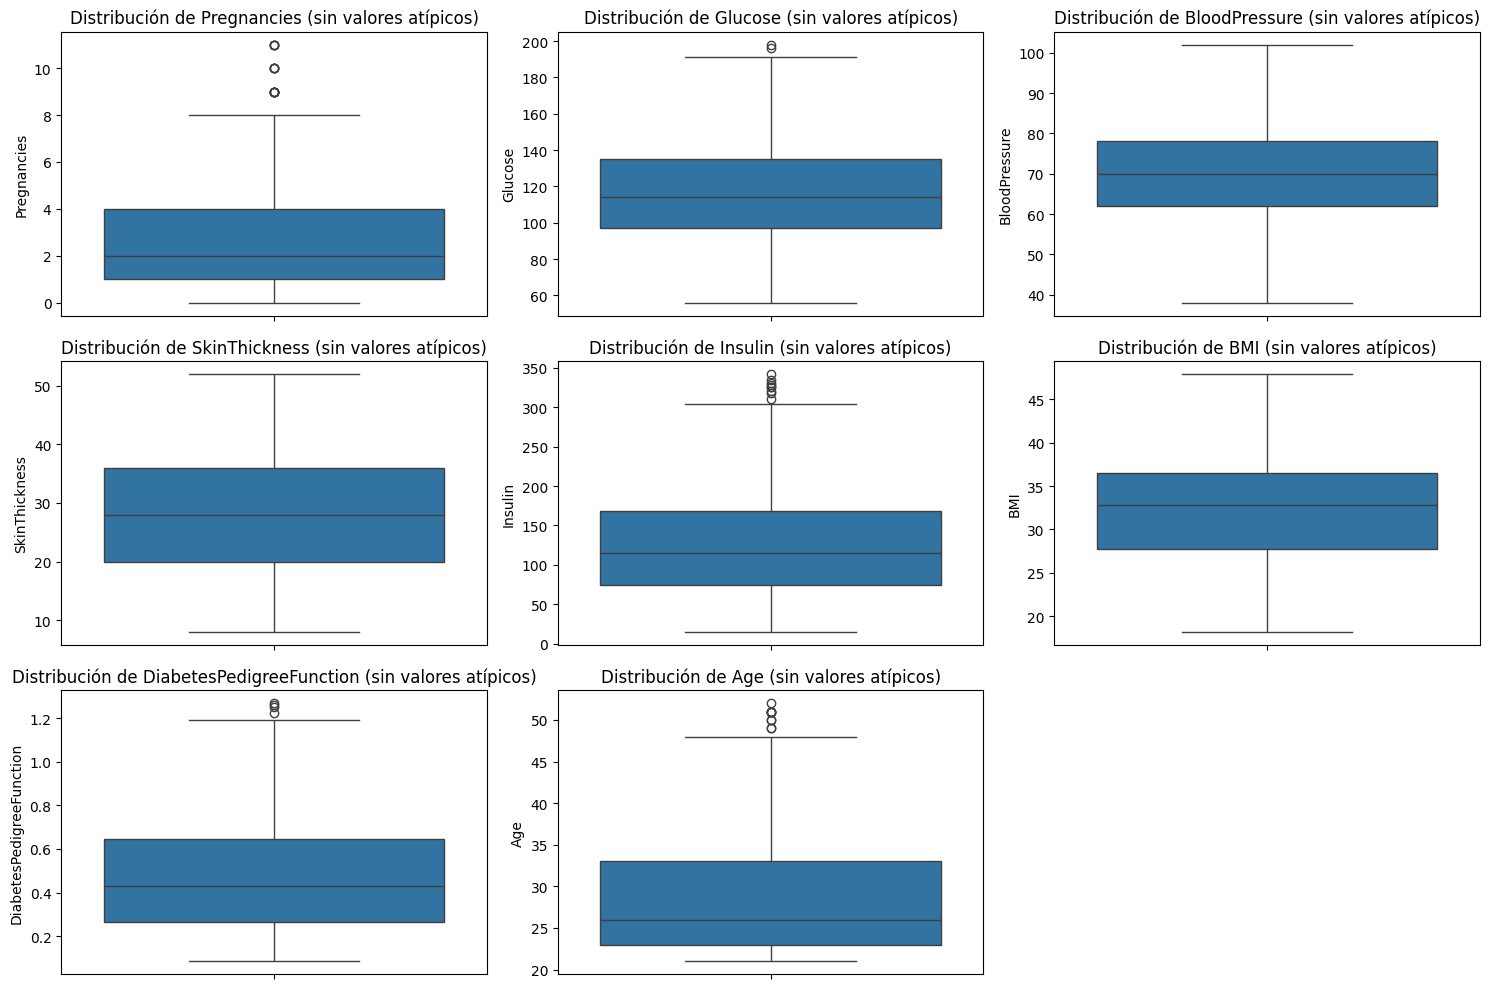

'\nNota de porque sigue habiendo algunos valores atipicos\nLa eliminación de valores atípicos modifica la distribución del dataset, lo que puede convertir algunos datos que \nantes eran normales en nuevos atípicos. Esto sucede porque, al reducir el rango intercuartílico (IQR) al eliminar datos \nextremos, los límites se ajustan, haciendo que algunos valores previamente aceptables se consideren atípicos. \nPara evitar este efecto y estabilizar la distribución, aplicamos la eliminación de valores atípicos una sola vez, \nutilizando umbrales iniciales basados en percentiles.\n\n'

In [6]:
plt.figure(figsize=(15, 10))  
for i, column in enumerate(dataset_clean.columns[:-1], 1): 
    plt.subplot(3, 3, i)  
    sns.boxplot(data=dataset_clean, y=column)
    plt.title(f'Distribución de {column} (sin valores atípicos)')

plt.tight_layout()
plt.show()

"""
Nota de porque sigue habiendo algunos valores atipicos
La eliminación de valores atípicos modifica la distribución del dataset, lo que puede convertir algunos datos que 
antes eran normales en nuevos atípicos. Esto sucede porque, al reducir el rango intercuartílico (IQR) al eliminar datos 
extremos, los límites se ajustan, haciendo que algunos valores previamente aceptables se consideren atípicos. 
Para evitar este efecto y estabilizar la distribución, aplicamos la eliminación de valores atípicos una sola vez, 
utilizando umbrales iniciales basados en percentiles.

"""



#### c) Realice un TomekLinks undersampling [1 pts]


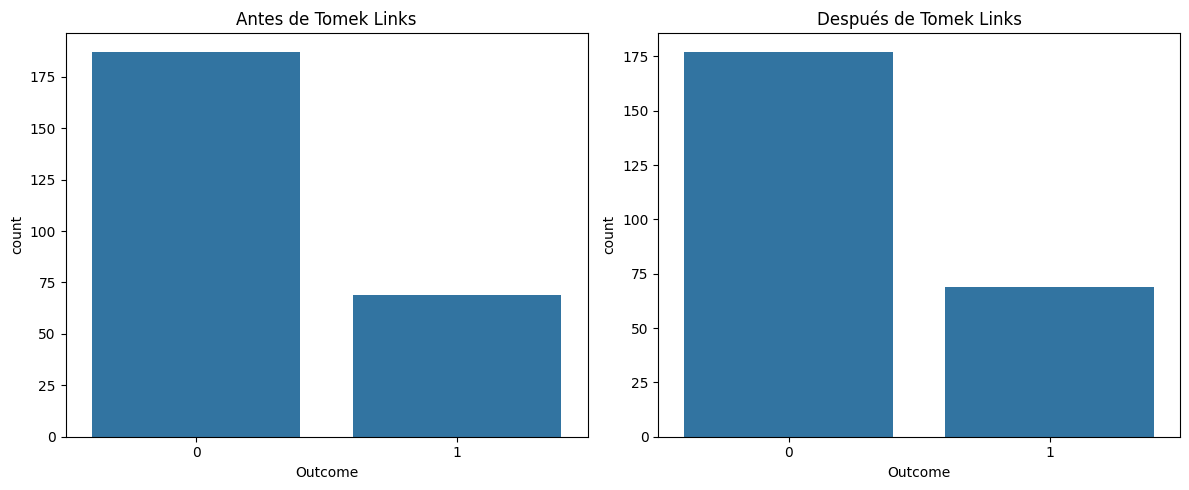

In [7]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import TomekLinks
from sklearn.preprocessing import StandardScaler

X_tomek = dataset_clean.drop(columns='Outcome')
y_tomek = dataset_clean['Outcome']

X_train_tomek, X_test_tomek, y_train_tomek, y_test_tomek = train_test_split(X_tomek, y_tomek, test_size=0.2, random_state=42, stratify=y_tomek)

tomek = TomekLinks(sampling_strategy='majority')
X_resampled_tomek, y_resampled_tomek = tomek.fit_resample(X_train_tomek, y_train_tomek)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=y_train_tomek)
plt.title('Antes de Tomek Links')
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled_tomek)
plt.title('Después de Tomek Links')
plt.tight_layout()
plt.show()

#### d) Realice un SMOte oversampling [1 pts]


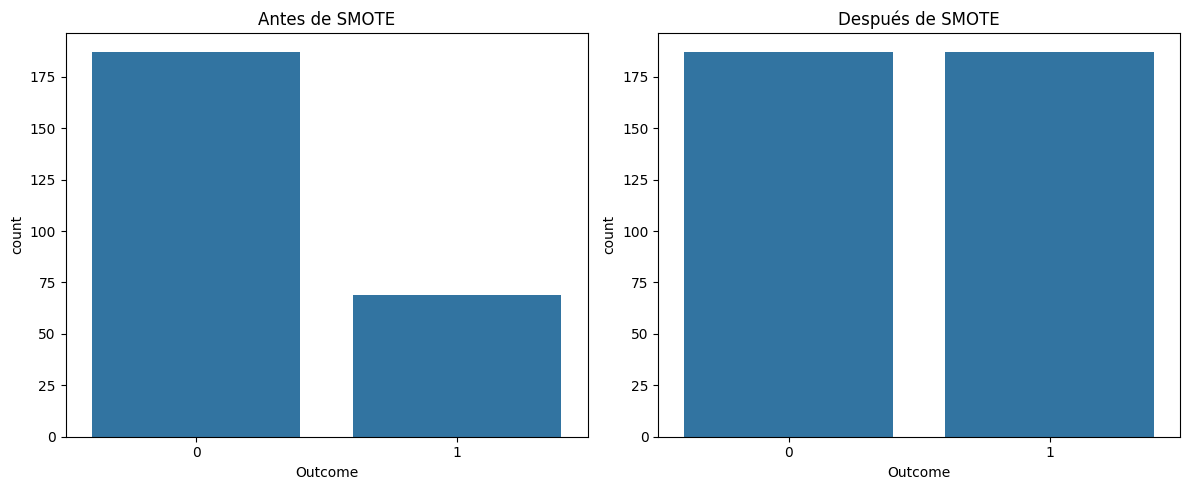

In [8]:
from imblearn.over_sampling import SMOTE

X_smote = dataset_clean.drop(columns='Outcome')
y_smote = dataset_clean['Outcome']

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote)

smote = SMOTE()
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train_smote, y_train_smote)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=y_train_smote)
plt.title('Antes de SMOTE')
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled_smote)
plt.title('Después de SMOTE')
plt.tight_layout()
plt.show()

#### e) Desarrolle un modelo de clasificación basado en LogisticRegression, SVM y BayesClassifier y Árboles de decisión. [1 pts]




In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


scaler = StandardScaler()
X_resampled_tomek = pd.DataFrame(scaler.fit_transform(X_resampled_tomek), columns=X_resampled_tomek.columns)
X_test_tomek = pd.DataFrame(scaler.transform(X_test_tomek), columns=X_test_tomek.columns)

X_resampled_smote = pd.DataFrame(scaler.fit_transform(X_resampled_smote), columns=X_resampled_smote.columns)
X_test_smote = pd.DataFrame(scaler.transform(X_test_smote), columns=X_test_smote.columns)

X_clean = dataset_clean.drop(columns='Outcome')
y_clean = dataset_clean['Outcome']

X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42, stratify=y_clean)

X_train_clean = pd.DataFrame(scaler.fit_transform(X_train_clean), columns=X_train_clean.columns)
X_test_clean = pd.DataFrame(scaler.transform(X_test_clean), columns=X_test_clean.columns)

models = {
    'Logistic Regression': LogisticRegression(penalty='l2', 
        C=1.0, 
        solver='liblinear',  
        max_iter=20,  
        random_state=42),
    'SVM': SVC( kernel='poly',  
    C=1, 
    degree=1,
    gamma='scale',  
    random_state=42,
    probability=True),
    'Naive Bayes': GaussianNB(var_smoothing=1e-9),
    'Decision Tree': DecisionTreeClassifier( criterion='gini',  
    max_depth=10, 
    min_samples_split=10,  
    min_samples_leaf=5,  
    max_features='sqrt',  
    random_state=42),
    'Random Forest': RandomForestClassifier(  n_estimators=20,  
    max_depth=10,  
    min_samples_split=10,  
    min_samples_leaf=5,  
    random_state=42)
}

metrics_dict = {
    "Model": [],
    "Dataset": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

predictions = {}


datasets = {
    "Clean Data": (X_train_clean, X_test_clean, y_train_clean, y_test_clean),
    "Tomek Links": (X_resampled_tomek, X_test_tomek, y_resampled_tomek, y_test_tomek),
    "SMOTE": (X_resampled_smote, X_test_smote, y_resampled_smote, y_test_smote)
}


#### f) Compare la performance de cada modelo en tres etapas. [2 pts] Modelo sin balanceo de datos.,Modelo con undersampling y Modelo con oversampling. La comparación debe ser numérica (Accuracy, Precision, Recalll y F1-Score) y gráfica (Matriz de confusión, curvas ROC)


Métricas de todos los modelos por dataset:
                  Model      Dataset Accuracy Precision Recall F1 Score
0   Logistic Regression   Clean Data     0.88      0.92   0.61     0.73
1   Logistic Regression  Tomek Links     0.86      0.85   0.61     0.71
2   Logistic Regression        SMOTE     0.77      0.57   0.67     0.62
3                   SVM   Clean Data     0.88      0.92   0.61     0.73
4                   SVM  Tomek Links     0.88      0.92   0.61     0.73
5                   SVM        SMOTE     0.71      0.48   0.61     0.54
6           Naive Bayes   Clean Data     0.82      0.69   0.61     0.65
7           Naive Bayes  Tomek Links     0.80      0.65   0.61     0.63
8           Naive Bayes        SMOTE     0.80      0.63   0.67     0.65
9         Decision Tree   Clean Data     0.80      0.63   0.67     0.65
10        Decision Tree  Tomek Links     0.75      0.55   0.61     0.58
11        Decision Tree        SMOTE     0.75      0.55   0.61     0.58
12        Random For

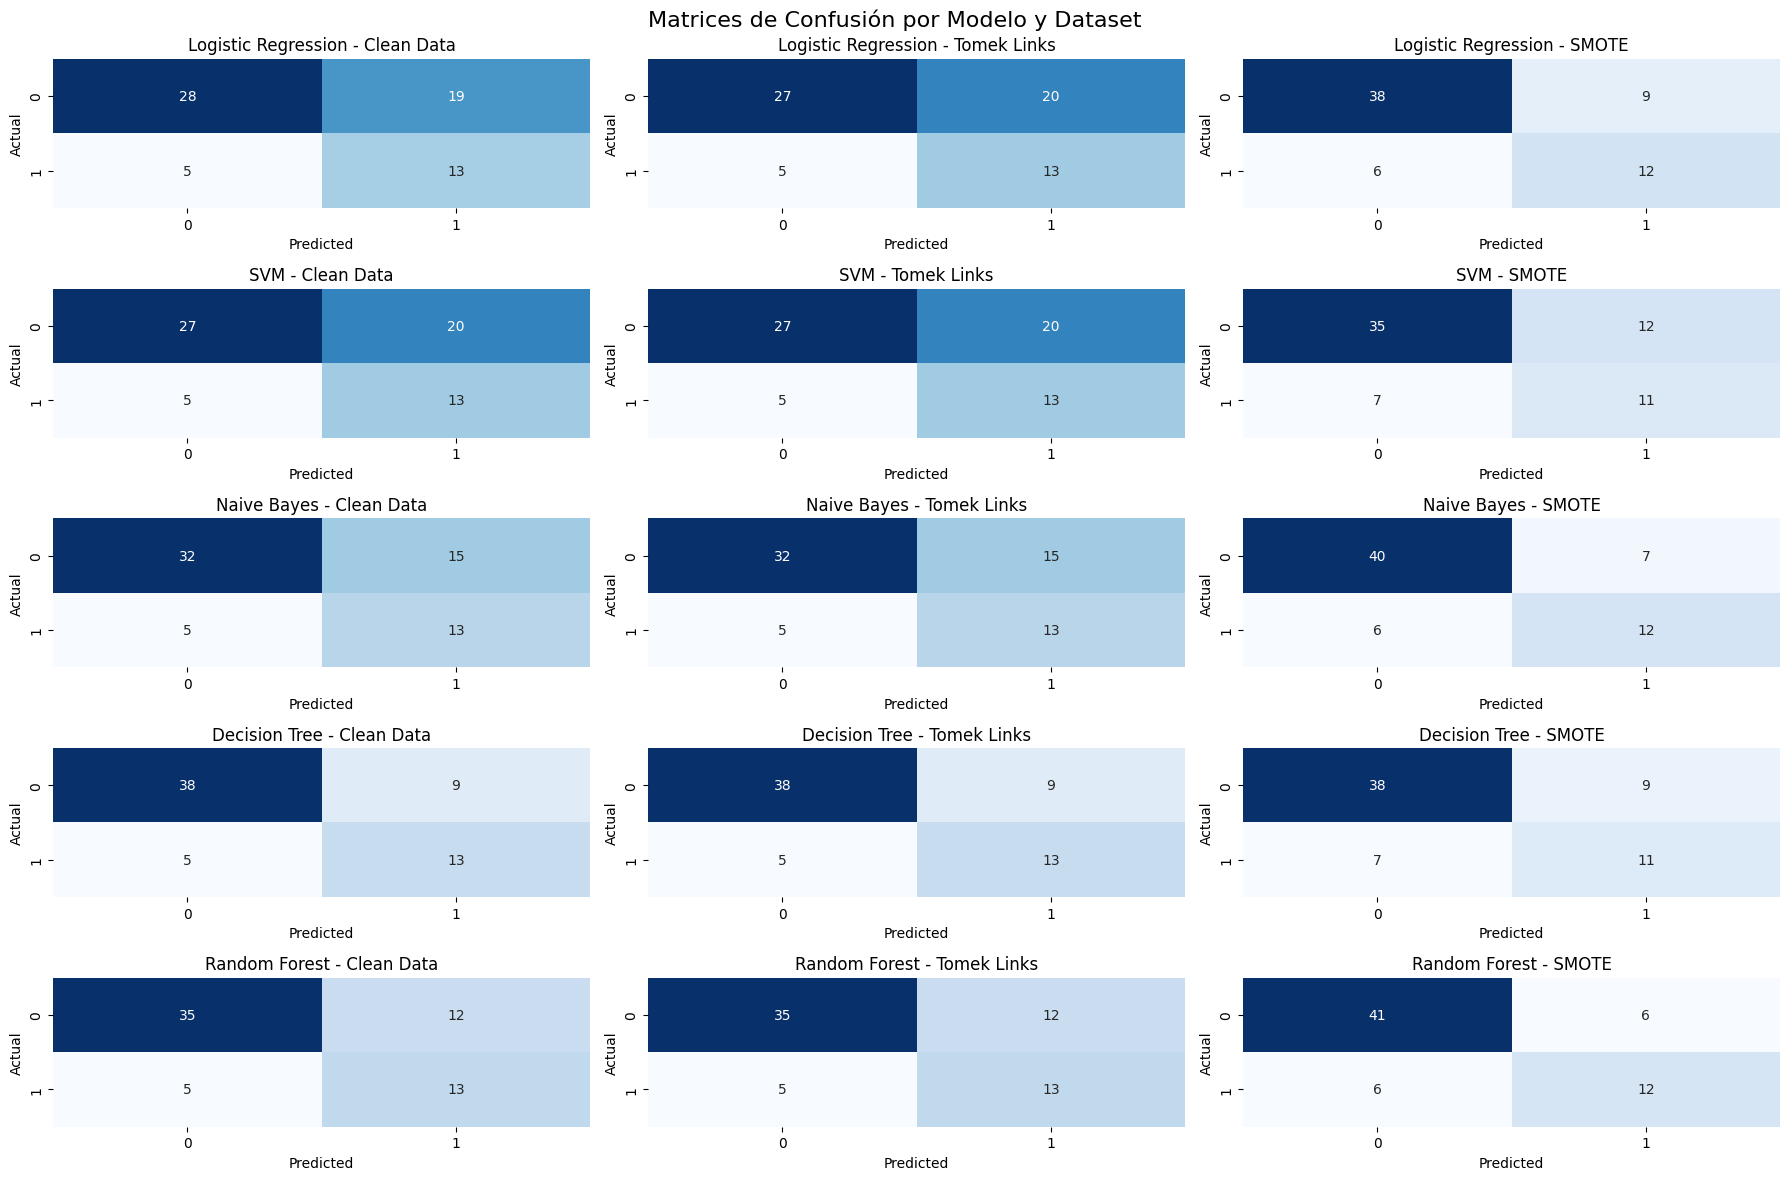

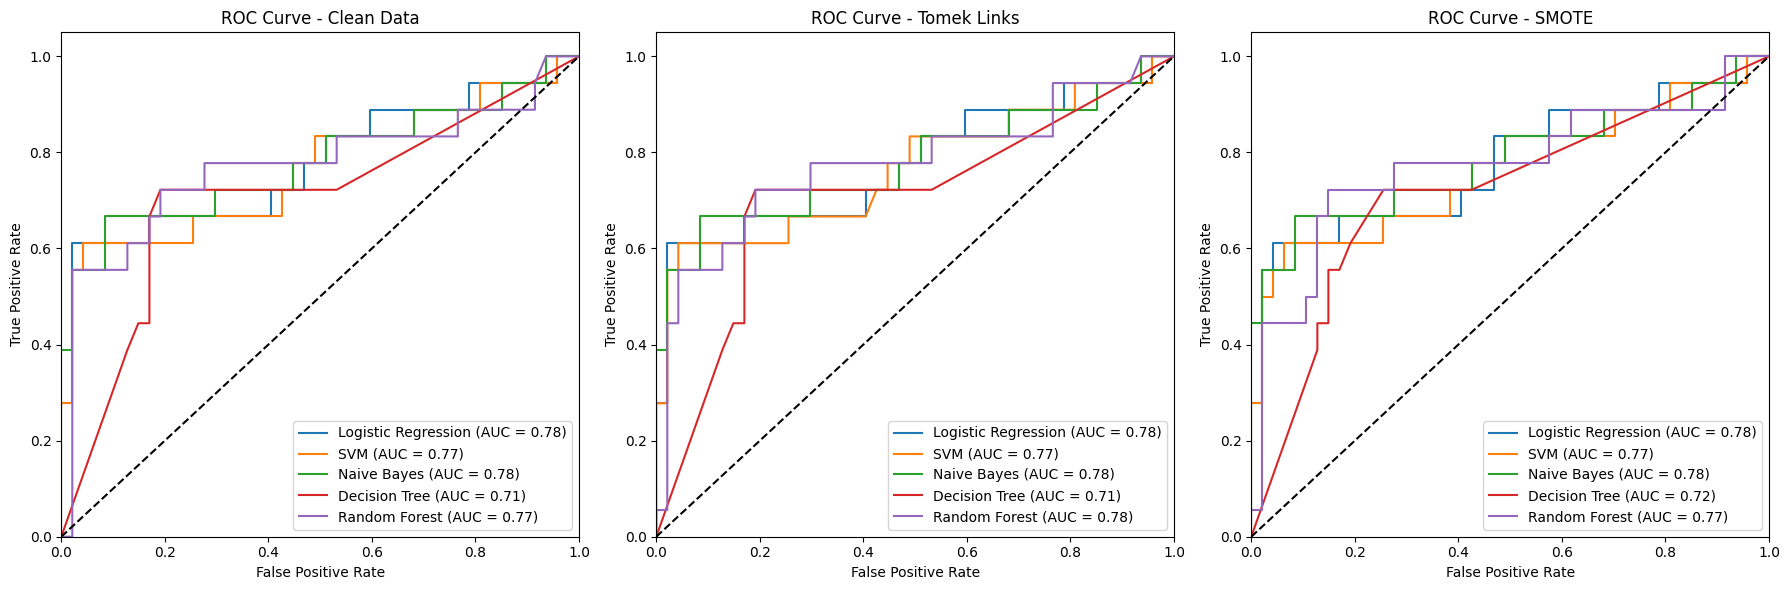

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score

for model_name, model in models.items():
    model_predictions = {}
    for data_name, (X_train, X_test, y_train, y_test) in datasets.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        model_predictions[data_name] = {'y_pred': y_pred, 'y_test': y_test}
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        metrics_dict["Model"].append(model_name)
        metrics_dict["Dataset"].append(data_name)
        metrics_dict["Accuracy"].append(f"{accuracy:.2f}")
        metrics_dict["Precision"].append(f"{precision:.2f}")
        metrics_dict["Recall"].append(f"{recall:.2f}")
        metrics_dict["F1 Score"].append(f"{f1:.2f}")
    
    predictions[model_name] = model_predictions

metrics_df = pd.DataFrame(metrics_dict)

print("\nMétricas de todos los modelos por dataset:")
print(metrics_df)

fig, axs = plt.subplots(nrows=len(models), ncols=len(datasets), figsize=(18, 12))
fig.suptitle("Matrices de Confusión por Modelo y Dataset", fontsize=16)

for row_idx, (model_name, model) in enumerate(models.items()):
    for col_idx, (data_name, (X_train, X_test, y_train, y_test)) in enumerate(datasets.items()):
        y_pred = model.predict(X_test)
        
        cm = confusion_matrix(y_test, y_pred)
        
        ax = axs[row_idx, col_idx]
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
        ax.set_title(f"{model_name} - {data_name}")
        ax.set_xlabel("Predicted")
        ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=len(datasets), figsize=(18, 6))

for col_idx, (data_name, (X_train, X_test, y_train, y_test)) in enumerate(datasets.items()):
    for model_name, model in models.items():
        if hasattr(model, "predict_proba"):
            y_pred_prob = model.predict_proba(X_test)[:, 1]
        else:
            y_pred_prob = model.decision_function(X_test)
            y_pred_prob = (y_pred_prob - y_pred_prob.min()) / (y_pred_prob.max() - y_pred_prob.min()) 
        
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)
        
        ax = axs[col_idx]
        ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

    axs[col_idx].plot([0, 1], [0, 1], 'k--')
    axs[col_idx].set_xlim([0.0, 1.0])
    axs[col_idx].set_ylim([0.0, 1.05])
    axs[col_idx].set_xlabel('False Positive Rate')
    axs[col_idx].set_ylabel('True Positive Rate')
    axs[col_idx].set_title(f'ROC Curve - {data_name}')
    axs[col_idx].legend(loc='lower right')

plt.tight_layout()
plt.show()







### Modelo no supervisado

#### Realizar una clusterización con KMeans. ¿Cuál es el mejor K para esta clusterización? ¿Por qué? 3ptos

##### Lectura del dataset

In [19]:
import pandas as pd


df=pd.read_csv('marketing_campaign.csv',sep='\t')

df = df.drop(columns=['ID'])

df=df.dropna()


columns_to_drop = [
    'Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2',
    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
    'Complain', 'Z_CostContact', 'Z_Revenue', 'Response','Marital_Status','Education','Dt_Customer'
]
df = df.drop(columns=columns_to_drop)

df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2216 non-null   int64  
 1   Income               2216 non-null   float64
 2   Recency              2216 non-null   int64  
 3   MntWines             2216 non-null   int64  
 4   MntFruits            2216 non-null   int64  
 5   MntMeatProducts      2216 non-null   int64  
 6   MntFishProducts      2216 non-null   int64  
 7   MntSweetProducts     2216 non-null   int64  
 8   MntGoldProds         2216 non-null   int64  
 9   NumDealsPurchases    2216 non-null   int64  
 10  NumWebPurchases      2216 non-null   int64  
 11  NumCatalogPurchases  2216 non-null   int64  
 12  NumStorePurchases    2216 non-null   int64  
 13  NumWebVisitsMonth    2216 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 259.7 KB


##### Distribuciones y relaciones del dataset

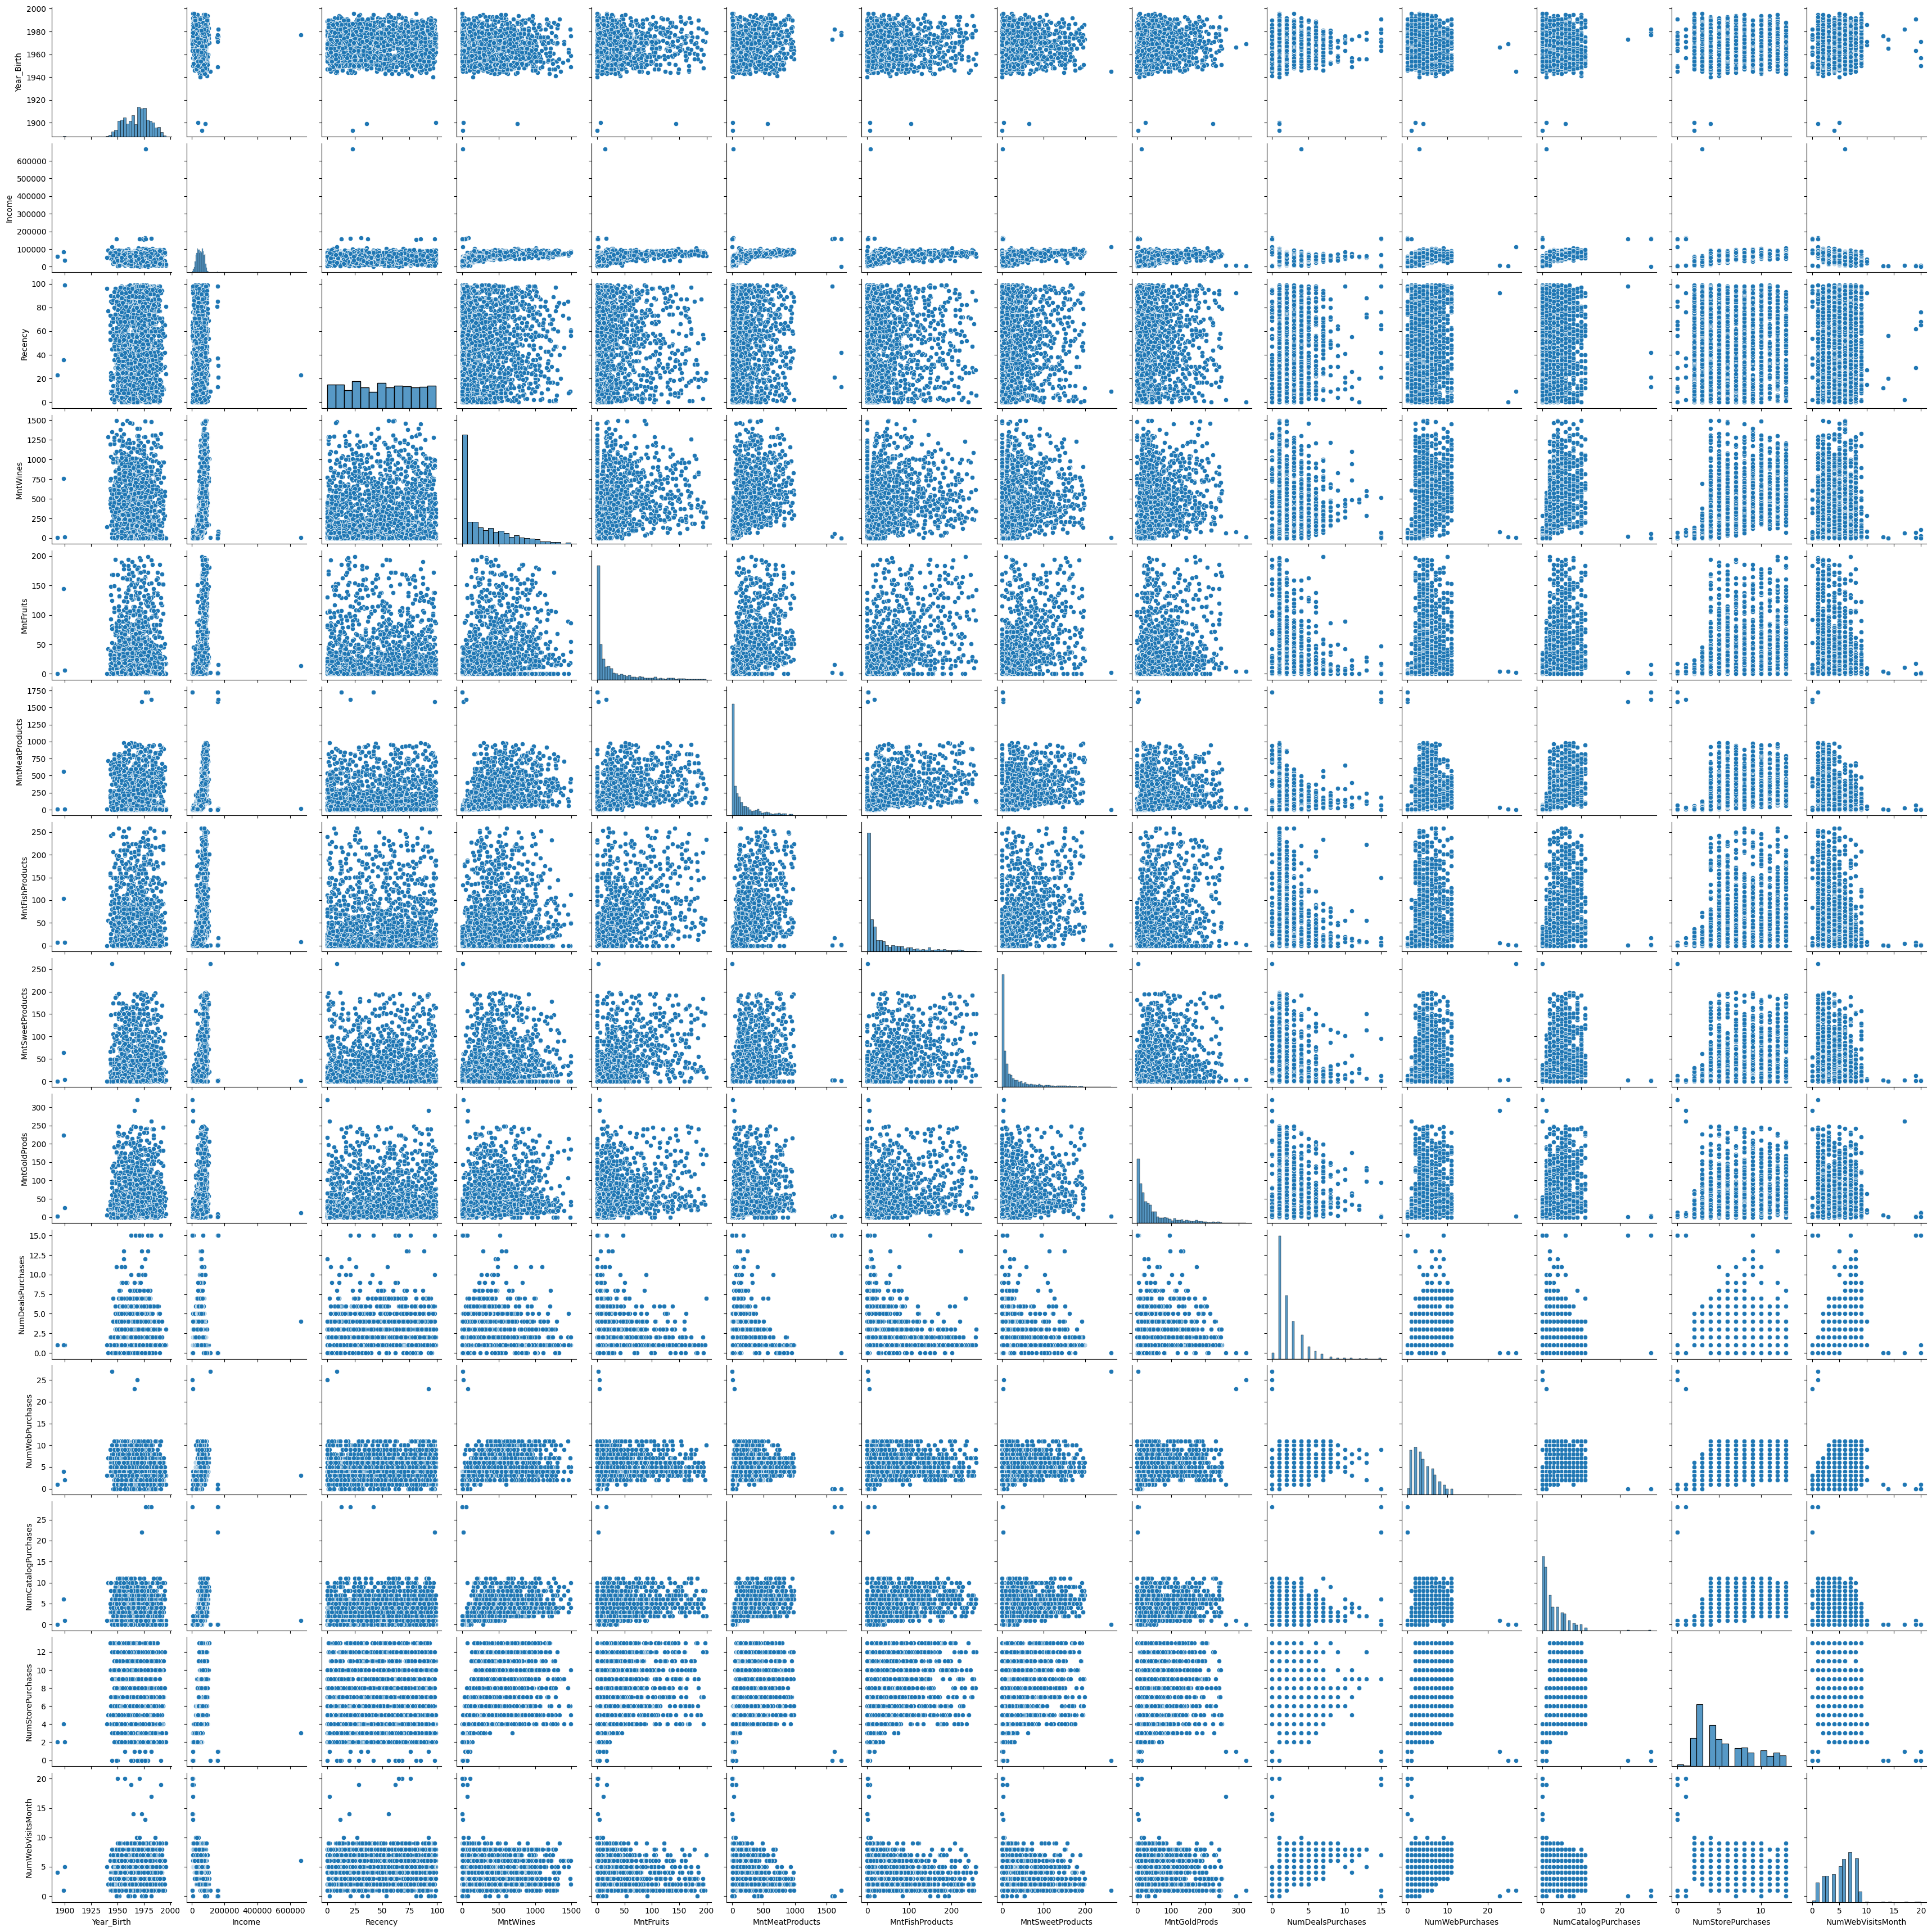

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()



##### Visualizando outliers

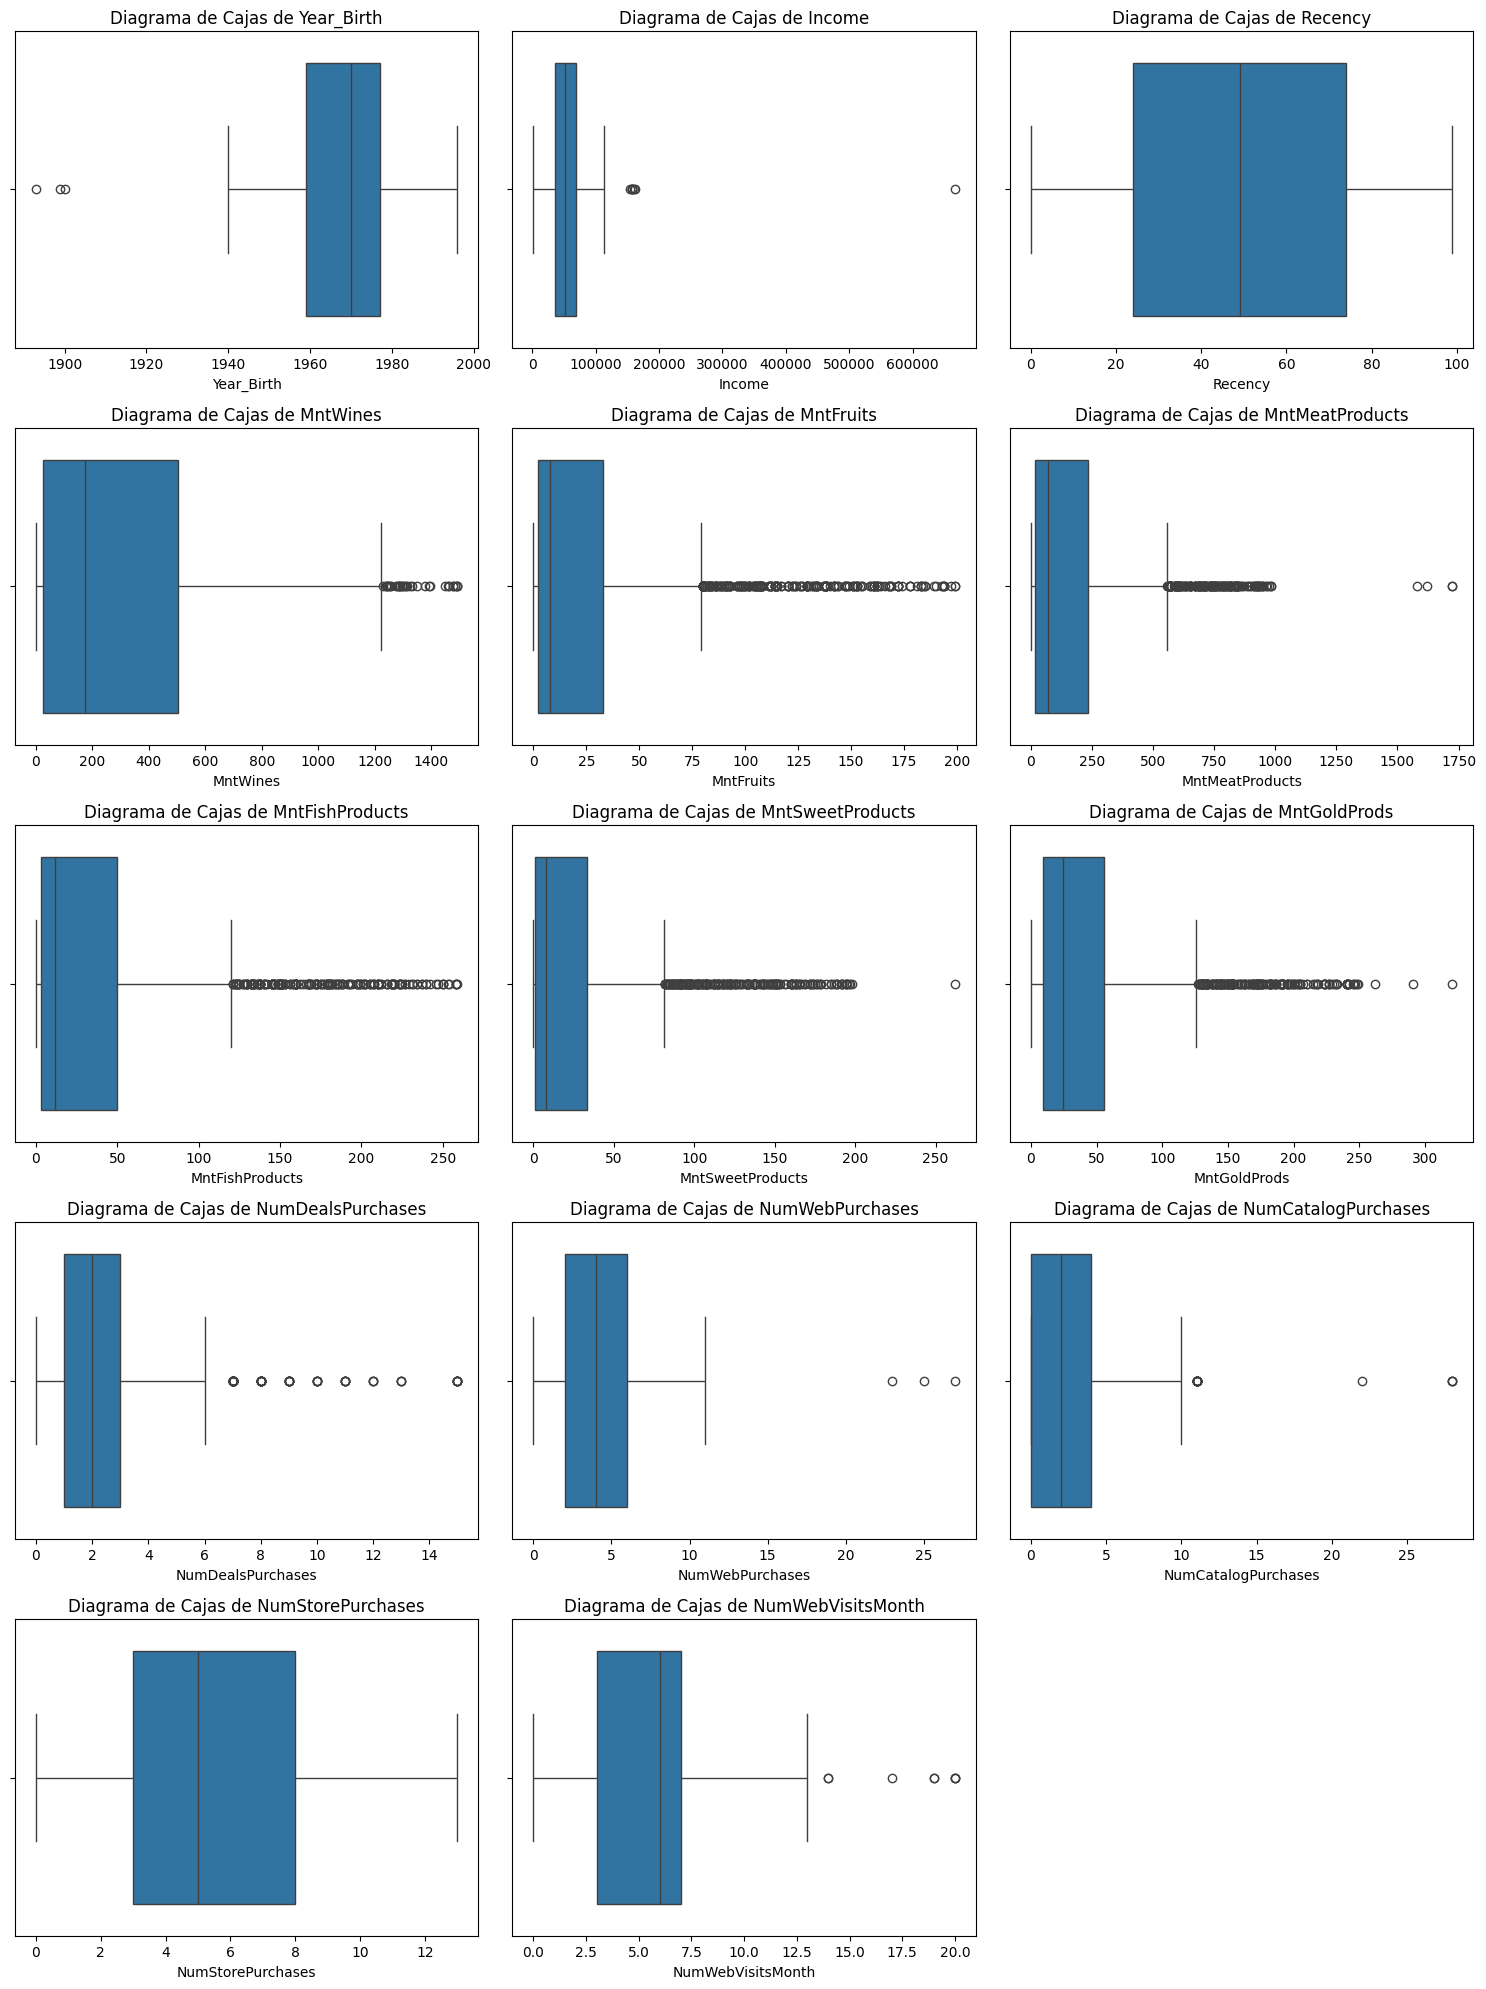

In [21]:
# Se elimina los outliers porque estos distorsionan las distancias, afectan el cálculo de la distancia euclidiana y 
# llevan a asignaciones incorrectas de puntos a clusters ademas de sesgar los centroides
numeric_cols = df.columns


num_cols = 3
num_rows = (len(numeric_cols) + num_cols - 1) // num_cols 

plt.figure(figsize=(15, num_rows * 4))  

for i, column in enumerate(numeric_cols, 1):
    plt.subplot(num_rows, num_cols, i)  
    sns.boxplot(data=df, x=column)  
    plt.title(f'Diagrama de Cajas de {column}')
    plt.xlabel(column)

plt.tight_layout()  
plt.show()

##### Eliminado outliers

In [22]:
def remove_outliers_iqr(data):
    numeric_cols = data.columns
    for column in numeric_cols:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

df_cleaned = remove_outliers_iqr(df)



##### Visualizando sin outliers

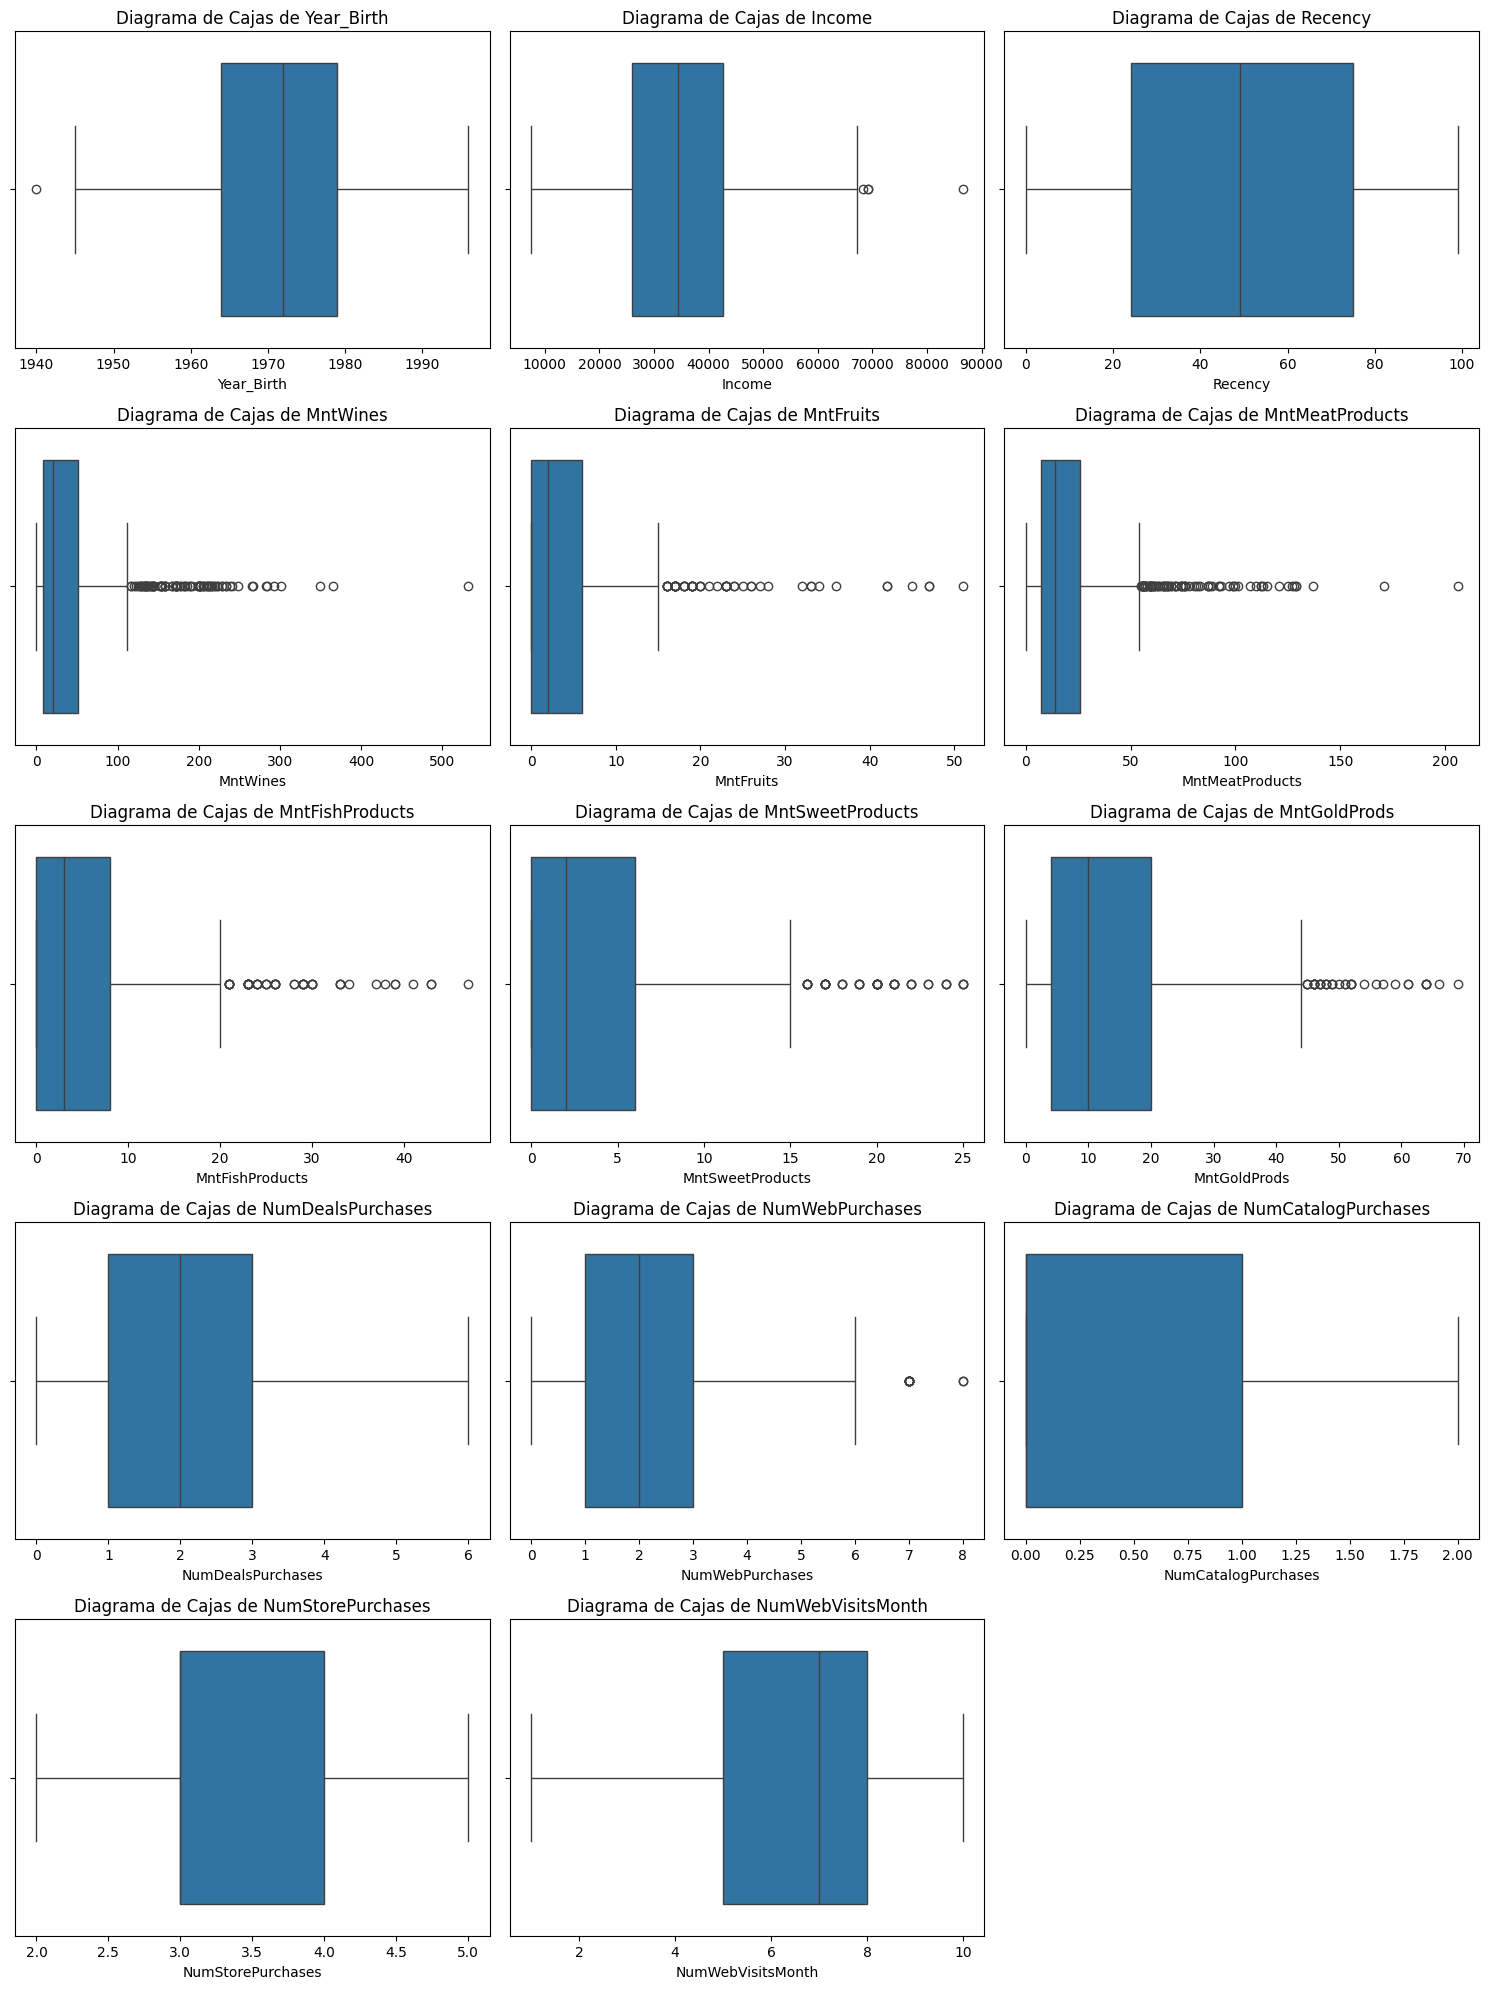

In [23]:
numeric_cols = df_cleaned.columns


num_cols = 3
num_rows = (len(numeric_cols) + num_cols - 1) // num_cols  

# Crear la figura
plt.figure(figsize=(15, num_rows * 4))  

for i, column in enumerate(numeric_cols, 1):
    plt.subplot(num_rows, num_cols, i)  
    sns.boxplot(data=df_cleaned, x=column)  
    plt.title(f'Diagrama de Cajas de {column}')
    plt.xlabel(column)

plt.tight_layout()  
plt.show()

##### Metodo del codo para determinar los K optimos

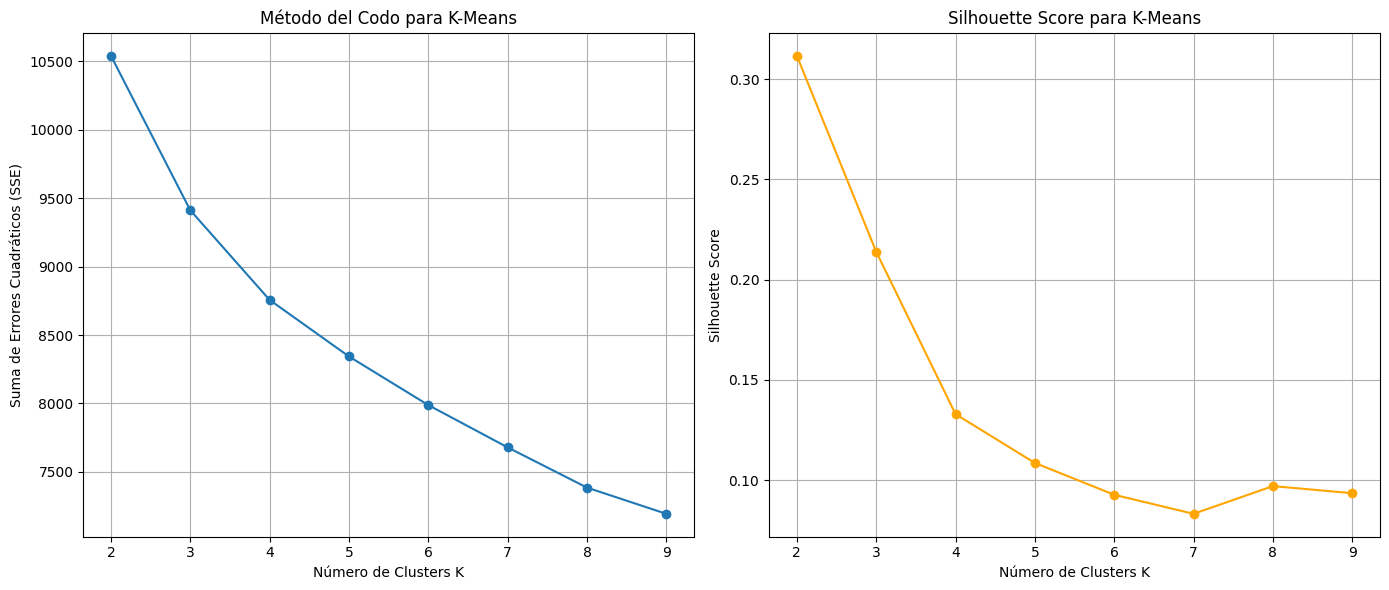

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)

k_values = range(2, 10)  
sse = []  
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, sse, marker='o')
plt.title('Método del Codo para K-Means')
plt.xlabel('Número de Clusters K')
plt.ylabel('Suma de Errores Cuadráticos (SSE)')
plt.xticks(k_values)
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score para K-Means')
plt.xlabel('Número de Clusters K')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid()

plt.tight_layout()
plt.show()

# Se logra determinar atraves del metodo del codo y silhouette score que el modelo alcanza su maximo rendimiento con k=2,luego
#para un k > 2 ese rendimiento cae.



##### Modelo K-means y visualizacion

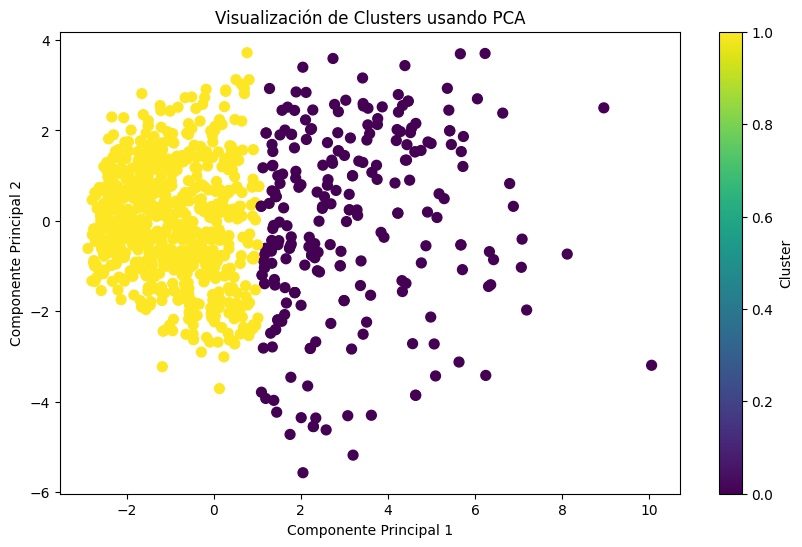

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_scaled)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', s=50)
plt.title('Visualización de Clusters usando PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()



#### Una vez elegido el K más adecuado. Describe las características principales de cada cluster 2pts

##### Visualizacion de cluster

In [26]:

df_scaled['Cluster'] = kmeans.labels_

cluster_summary = df_scaled.groupby('Cluster').mean().reset_index()

print("Características principales de cada cluster:")
print(cluster_summary)




Características principales de cada cluster:
   Cluster  Year_Birth    Income   Recency  MntWines  MntFruits  \
0        0   -0.193518  0.649672  0.098692  1.133610   0.741061   
1        1    0.062748 -0.210657 -0.032001 -0.367574  -0.240290   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0         1.218369         0.603453          0.714904      0.984874   
1        -0.395057        -0.195670         -0.231808     -0.319346   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0           0.818289         1.195718             1.009734           0.982517   
1          -0.265331        -0.387712            -0.327407          -0.318582   

   NumWebVisitsMonth  
0           0.111863  
1          -0.036272  


##### Intepretacion de cada cluster

##### Cluster 0

Representa un grupo de consumidores con las siguientes características principales:

##### Interpretación individual del cluster 0:

- **Edad (Year_Birth)**: Este grupo está compuesto por consumidores más jóvenes, con valores por debajo de la mediana (0.070).
- **Ingreso (Income)**: Los ingresos de este grupo están en el percentil 75% (0.662), lo que indica ingresos superiores al promedio.
- **Gasto en productos alimenticios**:
  - **Vino (MntWines)**: En el percentil 75%, este grupo gasta considerablemente en vino (1.50).
  - **Frutas (MntFruits)**: Gasto notable en productos frutales, superior a la media, con un percentil 75% de 0.25.
  - **Carnes (MntMeatProducts)**: Gasto elevado en productos cárnicos, con un percentil 75% de 0.18.
  - **Pescado (MntFishProducts), Dulces (MntSweetProducts) y Productos de oro (MntGoldProds)**: También muestran gastos superiores, con valores cercanos al 75%.
- **Compras Online (NumWebPurchases)**: Realizan una cantidad significativa de compras online, con un valor en el percentil 75% de 0.82.
- **Compras en tiendas (NumStorePurchases)**: Muestran un comportamiento activo en tiendas físicas también, con un percentil 75% de 0.97.

##### Interpretación general del cluster 0:

Este cluster representa un grupo de consumidores más jóvenes (Year_Birth) y con un ingreso superior (Income), que gasta mucho en productos alimenticios (MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds) y de lujo, y que realiza muchas compras online (NumWebPurchases) y en tiendas (NumStorePurchases).

---

##### Cluster 1

Por el contrario, el cluster 1 representa consumidores con las siguientes características:

##### Interpretación individual del cluster 1:

- **Edad (Year_Birth)**: Este grupo está compuesto por consumidores más mayores, cercanos a la mediana (0.07) pero sin desviarse hacia el extremo joven.
- **Ingreso (Income)**: Este grupo tiene ingresos menores al promedio, representado por el percentil 25% (-0.72).
- **Gasto en productos alimenticios**:
  - **Vino (MntWines)**: Su gasto en vino es bajo, con un valor en el percentil 25% de -0.59.
  - **Frutas (MntFruits), Carnes (MntMeatProducts), Pescado (MntFishProducts), Dulces (MntSweetProducts) y Productos de oro (MntGoldProds)**: Tienen gastos bajos o moderados, con valores cercanos al percentil 25%.
- **Compras Online (NumWebPurchases) y Compras en tiendas (NumStorePurchases)**: Su actividad de compras tanto online como en tiendas físicas es menor, con valores en el percentil 25% alrededor de -0.87 para compras online y -1.36 para visitas en tienda.

##### Interpretación general del cluster 1:

Este cluster representa un grupo de consumidores más mayores (Year_Birth), con ingresos más bajos (Income) y menos actividad en términos de compras, tanto online (NumWebPurchases) como en tiendas físicas (NumStorePurchases).


## Parte 2: Congreso

### Congreso 1


#### NOMBRE DE LA ACTIVIDAD A comprehensive Market Price analysis using Python

**EXPOSITOR PRINCIPAL:** Fernando Baca Ordoñez  
**FECHA / HORA:** 30/10/24 - 4:30-5:00

---

#### PREGUNTAS

##### ¿De qué trató la actividad? (100 a 150 palabras)
La actividad fue una presentación sobre el uso de Python para el análisis de empresas en el mercado y la automatización de estrategias de inversión. Se mencionaron diversos modelos financieros y cómo la herramienta permite a los usuarios seleccionar activos específicos y aplicarles modelos matemáticos como el de Markowitz, el CAPM, o el índice VIX, para analizar su rendimiento. Se destacó la importancia de la inclusión financiera en Latinoamérica, donde solo un pequeño porcentaje de la población accede a servicios financieros formales. El proyecto presentado pretende facilitar el acceso a estrategias de inversión a través de una consola interactiva en Python, lo cual permite personalizar y simular carteras, promoviendo una mayor comprensión de los riesgos y oportunidades en el mercado.

##### ¿Qué aprendiste? (100 a 150 palabras)
La presentación proporcionó un entendimiento valioso sobre cómo la automatización en Python puede simplificar el análisis financiero. Aprendí acerca de la implementación de modelos teóricos como el de Markowitz y el CAPM para la evaluación de riesgo y retorno de carteras, así como del uso de métricas de volatilidad como el índice VIX para predecir tendencias de mercado. Además, comprendí el potencial de las herramientas de programación para democratizar el acceso a estrategias financieras, permitiendo que personas sin conocimientos avanzados de programación utilicen estos modelos para tomar decisiones más informadas. Finalmente, fue enriquecedor ver cómo una herramienta basada en Python puede organizar información financiera compleja y presentarla de manera accesible para el usuario.

##### ¿Cómo podrías aplicar lo aprendido en algún proyecto de impacto a la sociedad? (250 a 300 palabras)
Este aprendizaje podría aplicarse en un proyecto de impacto social enfocado en promover la inclusión financiera y la educación en inversiones para poblaciones con acceso limitado a servicios financieros formales, como ocurre en muchos países de Latinoamérica. Dado que menos del 40% de la población en la región tiene acceso a servicios bancarios, una plataforma accesible y educativa permitiría a estos usuarios explorar el mundo de las inversiones sin conocimientos avanzados o experiencia previa.

El proyecto podría consistir en una plataforma digital o una aplicación móvil gratuita, diseñada para guiar a los usuarios en la simulación de estrategias de inversión utilizando modelos financieros clásicos como el de Markowitz para la diversificación de portafolios, el CAPM para la evaluación del rendimiento ajustado al riesgo, y el índice VIX para medir la volatilidad del mercado. La interfaz sería interactiva, planteando preguntas al usuario para determinar su perfil de riesgo y sus intereses financieros. Dependiendo de sus respuestas, la aplicación le mostraría posibles carteras o estrategias de inversión, comparando el rendimiento de diferentes activos, y brindándole información visual en gráficos fáciles de interpretar.

Además, la plataforma podría incluir módulos de educación financiera con materiales audiovisuales que expliquen conceptos básicos de inversión, ahorro, y la importancia de diversificación. Así, los usuarios no solo obtendrían sugerencias basadas en modelos financieros sino también una base sólida de conocimientos que les permita tomar decisiones informadas y, eventualmente, acceder a servicios financieros formales.

Este proyecto fomentaría una mayor participación financiera y mejoraría la comprensión de conceptos económicos entre personas de diversos contextos socioeconómicos. De esta manera, contribuiría a reducir la brecha de inclusión financiera en la región, permitiendo que más personas accedan a instrumentos de inversión, comprendan los riesgos, y se animen a participar activamente en el crecimiento económico de sus comunidades.


### Congreso 2

#### Actividad: Countering Generative AI-driven Social Engineering and Phishing: A Threat Modeling and Cybersecurity Awareness Framework

**EXPOSITOR PRINCIPAL:** Miguel Prada  
**FECHA / HORA:** 29/10/24 - 6:00-6:30

---

#### PREGUNTAS

##### ¿De qué trató la actividad? (100 a 150 palabras)
La actividad consistió en una presentación sobre las técnicas de detección de riesgos en el ámbito de la ciberseguridad, enfocándose principalmente en ataques de phishing y la prevención de ataques a través de la inteligencia artificial generativa. Se introdujo métodos como el modelo de amenazas Stride y el árbol de ataque, herramientas que permiten analizar y descomponer los pasos de un potencial ataque para diseñar estrategias preventivas. Además, se abordó el uso de la capacitación en ciberseguridad como medida para educar y preparar a los usuarios contra intentos de ingeniería social, así como la integración de IA para detectar patrones de ataques en tiempo real.

##### ¿Qué aprendiste? (100 a 150 palabras)
En esta actividad, aprendí sobre las distintas metodologías y herramientas disponibles para mejorar la ciberseguridad en el contexto de ataques de phishing y otras amenazas. Me familiaricé con el modelo Stride, que permite identificar puntos vulnerables en sistemas corporativos y la importancia de involucrar a los usuarios en la prevención de ciberataques. También comprendí cómo las soluciones basadas en IA están avanzando en la detección y respuesta a amenazas, y cómo las tecnologías de aprendizaje automático pueden complementar los métodos tradicionales. Esta combinación de enfoques, tanto de formación de usuarios como de implementación de tecnología avanzada, representa una sólida estrategia de defensa ante las crecientes amenazas de ingeniería social y ataques de phishing.

##### ¿Cómo podrías aplicar lo aprendido en algún proyecto de impacto a la sociedad? (250 a 300 palabras)
La actividad realizada ofrece enseñanzas aplicables a proyectos de impacto social en el ámbito de la ciberseguridad. Un ejemplo de proyecto podría ser la implementación de un programa de concientización y capacitación para usuarios de instituciones educativas y servicios públicos, enfocado en la identificación y prevención de intentos de phishing. Este programa podría incluir módulos de simulación, donde los participantes practiquen la detección de correos electrónicos y sitios web fraudulentos, y además reciban recursos que les permitan responder adecuadamente. Estos módulos de simulación no solo aumentarían la confianza del usuario al enfrentarse a posibles ciberamenazas, sino que también generarían una conciencia colectiva sobre las prácticas de seguridad digital, promoviendo una cultura de ciberseguridad activa.

Asimismo, dada la relevancia de la inteligencia artificial en la ciberseguridad, otro componente fundamental del proyecto podría ser el desarrollo de una plataforma innovadora basada en aprendizaje automático para analizar patrones de amenazas. Esta plataforma emitiría alertas tempranas a los usuarios, especialmente en sectores sensibles donde el robo de datos podría tener un impacto significativo en la comunidad, como los sectores de salud y financiero. Con estas alertas, tanto los usuarios como los administradores de sistemas serían informados sobre posibles intentos de phishing y otros ataques, permitiendo una respuesta proactiva y reduciendo el riesgo de afectaciones.

Este proyecto, en conjunto, contribuiría a disminuir la incidencia de ciberataques y a proteger la información confidencial de los usuarios, promoviendo así una cultura de ciberseguridad activa y consciente en la sociedad, y generando un impacto positivo a largo plazo.


## Parte 3: Multimedia

### ENTREVISTA MARK ZUCKERBERG:

* Según MZ, ¿cuál fue la duración de la investigación y desarrollo de las gafas AR holográficas de Meta?

La duración fue de diez años.

* ¿Qué característica anunció recientemente Meta para las gafas Ray-Ban Meta que se relaciona con las barreras del idioma?

Meta anunció una función de traducción en tiempo real en las gafas Ray-Ban Meta, que permite escuchar traducciones en diferentes idiomas mientras se viaja.

* En la entrevista, ¿qué porcentaje de disminución en el tiempo de socialización se mencionó para los estadounidenses de 15 a 24 años?

Se mencionó una disminución de casi el 70% en el tiempo de socialización en persona para este grupo de edad.

* ¿Qué deporte menciona MZ al discutir la tecnología de retroalimentación háptica?

MZ menciona el ping pong y también hace referencia a la lucha jiu-jitsu como ejemplos para discutir la retroalimentación háptica.

* ¿cuántas GPUs se utilizaron para entrenar Llama 3?

Se utilizaron entre 10,000 y 20,000 GPUs para entrenar Llama 3.

### ENTREVISTA SUNDAR PICHAI:


* ¿Por qué Sundar Pichai pensó que el lanzamiento de GMail era una broma?

Porque fue entrevistado para Google el 1 de abril, día de los inocentes en muchos países, y justo ese día Gmail fue lanzado, lo que le hizo pensar que podría ser una broma.

* ¿Qué fue lo primero que hizo Sundar Pichai como CEO de Alphabet?

En 2016, una de las primeras cosas que hizo fue enfocar la empresa para que fuera "primero en IA" (inteligencia artificial).

* ¿A qué hace referencia cuando habla de la sensación de deja-vú?

Se refiere a que después de una década en el cargo, ha experimentado patrones similares, lo que le ayuda a reconocer situaciones y actuar de manera más efectiva.

* ¿Por qué la entrevistadora dice que en Google inventaron el GPT?

Porque los investigadores de Google inventaron el "transformer", que es la "T" en GPT y una tecnología fundamental para los modelos de lenguaje como ChatGPT.

* En la conversación, qué ejemplo se da para un problema donde "¿buenas intenciones pueden salir mal?"

Se menciona el caso de modelos de IA que generan imágenes de figuras históricas o roles específicos (como maestros o doctores) con diversidad étnica, incluso cuando no corresponde, como en las imágenes de los Padres Fundadores que fueron generadas como personas negras, lo cual no era históricamente exacto.

* ¿Qué debes hacer, según Sundar Pichai, para evitar convertirte en un dinosaurio en la tecnología?

Innovar constantemente para mantenerse a la vanguardia; de lo contrario, la compañía puede quedar obsoleta, como un "dinosaurio".

* ¿Cuál es la tecnología que estará en el centro de la innovación en IA después de los smartphones?

Sundar Pichai menciona que los lentes inteligentes serán el siguiente centro de innovación en IA después de los smartphones.


* Para Sundar Pichai ¿Qué significa Artificial General Intelligente (AGI)?

Para él, AGI significa que la IA es capaz de realizar bien una amplia variedad de actividades económicas, es decir, desempeñarse eficientemente en muchas tareas diferentes.

### ENTREVISTA MIRA MURATI:



* Según Murati ¿Cuál es el trabajo de un(a) CTO?

Una combinación de practicas para guiar a los equipos siguiendo una estrategia a largo plazo, descubrir brechas entre ellos y asegurarse de que los equipos son apoyados lo suficiente para hacerlos lograr el exito.


* ¿Qué fue lo que le sorprendió sobre el lanzamiento de ChatGPT?

Que se convirtió en el producto tecnologico que más rapido creció en la historia. Al liberarlo al publico logró capturar la imaginación de los usuarios y  agradó  tanto al publico en todas sus interacciones, recibiendo mucho feedback. 

* ¿Por qué dice que ChatGPT es distinto a Google?

Primero indica que con ChatGPT nunca se tuvo en mente las busquedas, lo que ofrece es una manera de comprender información y que a diferencia de una busqueda basada de keywords tiene una manera mas intuitiva de hacerlo

* ¿Por qué se utiliza el término 'halucinación' cuando una IA solo está cometiendo errores?

ira menciona como ejemplo que en una conversación real entre humano uno no tiene una respuetsa algo solemos "inventaremos" una respuesta debido a que rara vez respondemos con que simplemente "no sabemos" o no tenemos una respuesta, a lo que tambien se podria referir como que solemos tener "alucinaciones" en una conversación. Por loq que podemos asumir de que el modelo de GPT4 al igual que un humano real puede terminar cayendo en este tipo de comportamientos.

* ¿Qué opina Mira Murati sobre exponer a poblaciones vulnerables a sistemas de IA tan poderosos?

Menciona de que hay que ser precavidos, especialmente con niños y menores de eddad , ya que al tratarse de tecnologias nuevas todavia no entendemos todas las formas en las que podria afectar a las personas.

* ¿Qué es Blitzcaling?

Se trata de la practica de priorizar velocidad por sobre eficiencia en un entorno de incertidumbre, generalmente utilizado para hacer crecer rapidamente un negocio y ganar dominio de mercado al ser el primero .

* ¿Qué es la AI mafia?

Se refieren a que la gran mayoria de tecnologias de AI están siendo desarrolladas por un grupo selecto de empresas e individuos, lo cual es ha sido lo normal para casi cualquier teconlogia a lo largo de la historia.